
#Q2.

**Here $n=4$ and $ a=14$ and $\sum{jx_j} > 14$.**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

In [ ]:
def feas_permu(n,a):
  F=[]
  P=np.arange(1,n+1)
  pp=permutations(P)
  p=list(pp)
  for i in range(len(p)):
    s=0
    for j in range(n):
      s = s + (j+1)*p[i][j]
    if s > a :
      F.append(p[i])
  return F
feas_permu(4,14)

[(1, 2, 3, 4),
 (1, 2, 4, 3),
 (1, 3, 2, 4),
 (1, 3, 4, 2),
 (1, 4, 2, 3),
 (1, 4, 3, 2),
 (2, 1, 3, 4),
 (2, 1, 4, 3),
 (2, 3, 1, 4),
 (2, 3, 4, 1),
 (2, 4, 1, 3),
 (2, 4, 3, 1),
 (3, 1, 2, 4),
 (3, 1, 4, 2),
 (3, 2, 1, 4),
 (3, 2, 4, 1),
 (3, 4, 1, 2),
 (3, 4, 2, 1),
 (4, 1, 2, 3),
 (4, 1, 3, 2),
 (4, 2, 1, 3),
 (4, 2, 3, 1),
 (4, 3, 1, 2),
 (4, 3, 2, 1)]

In [ ]:
#Random Feasible Permutation:
def random_feas_permu(n,a):
  p=feas_permu(n,a)
  np.random.shuffle(p)
  return p[0]
random_feas_permu(4,14)

(4, 2, 3, 1)

In [ ]:
#generating uniform permutation
def generate_permu_uniform(N,n,a):
  A=[]
  for i in range(N):
    gpu=random_feas_permu(n,a)
    A.append(str(gpu))
  plt.figure(figsize=(25,10))
  plt.hist(A)
  plt.show()

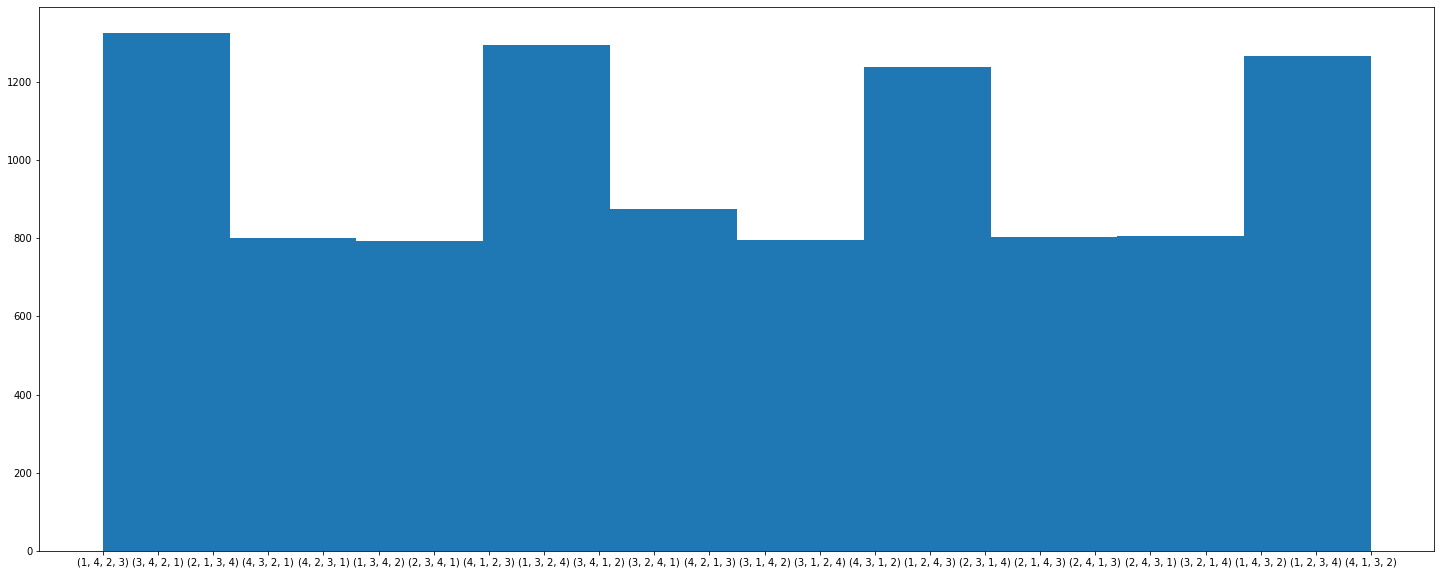

In [ ]:
generate_permu_uniform(10000,4,14)

#Q3.

In [ ]:
def neighbours(p):
  neighbour=[]
  N=len(p)
  a=list(p)
  for i in range(N):
    for j in range(i+1,N):
      ai=a[i]
      aj=a[j]
      a[i]=aj
      a[j]=ai
      neighbour.append(tuple(a))
      a=list(p)
  return neighbour

In [ ]:
def feas_neighbours(n,a,p):
  F=[]
  pp=neighbours(p)
  for i in range(len(pp)):
    s=0
    for j in range(n):
      s = s + (j+1)*pp[i][j]
    if s > a :
      F.append(pp[i])
  return F

In [ ]:
def random_feas_neighbour(n,a,p):
  a=feas_neighbours(n,a,p)
  np.random.shuffle(a)
  return a[0]

In [ ]:
def q(i,j):
  ib=neighbours(i)
  q=0
  if j in ib:
    q=1/len(ib)
  return q

def alpha(i,j):
  a=min(q(j,i)/q(i,j),1)
  return a

#Q5.

In [ ]:
def generate_permu_MCMC(N,n,a):
  p=random_feas_permu(n,a)
  A=[]
  for i in range(10000):
    p=random_feas_neighbour(n,a,p)
    A.append(str(p))
  plt.figure(figsize=(25,10))
  plt.hist(A)
  plt.show()

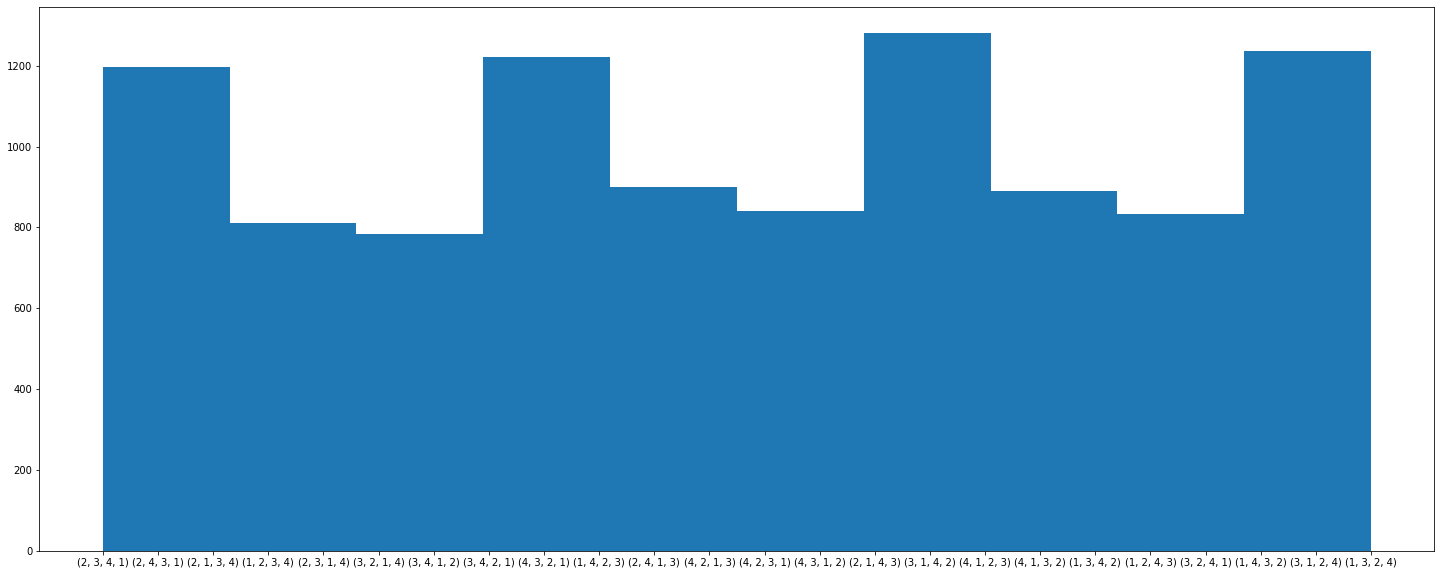

In [ ]:
generate_permu_MCMC(10000,4,11)

For some other values:

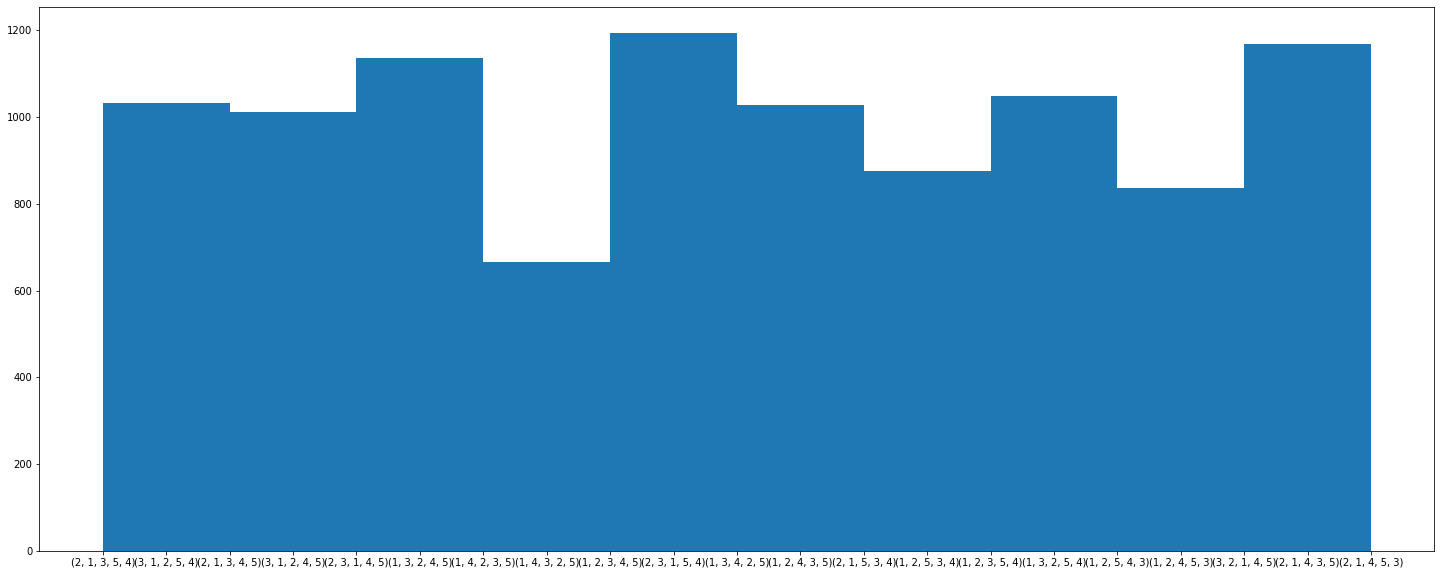

In [ ]:
generate_permu_MCMC(10000,5,50)

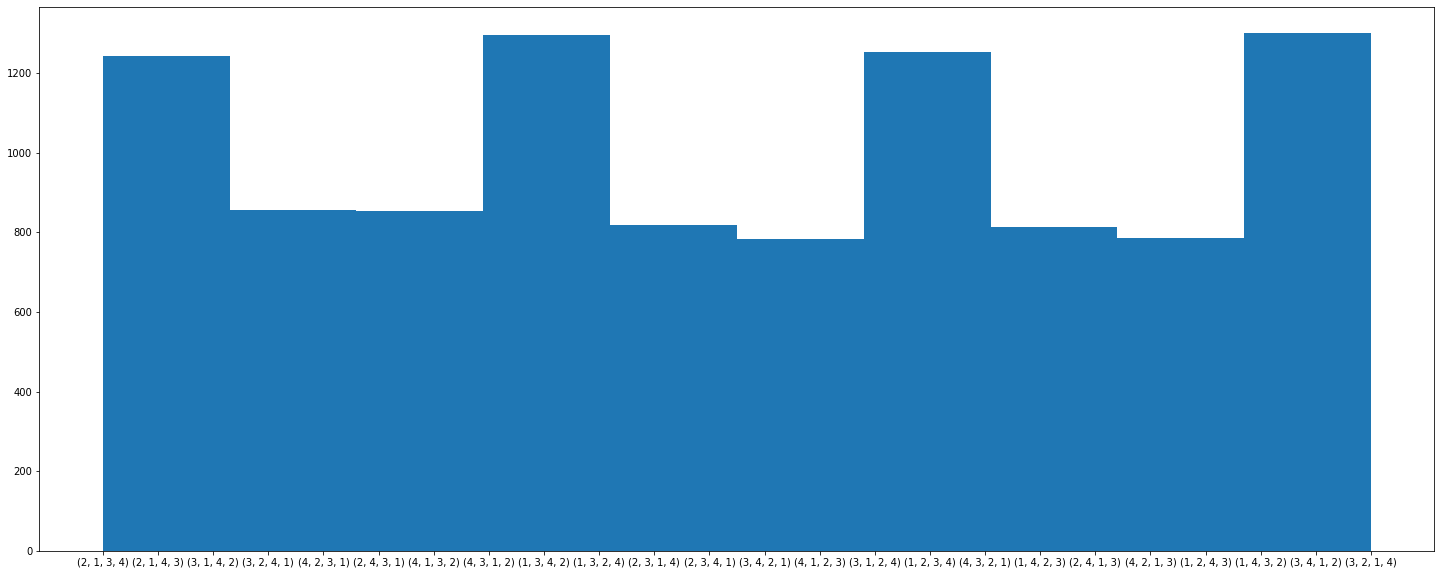

In [ ]:
generate_permu_MCMC(10000,4,16)

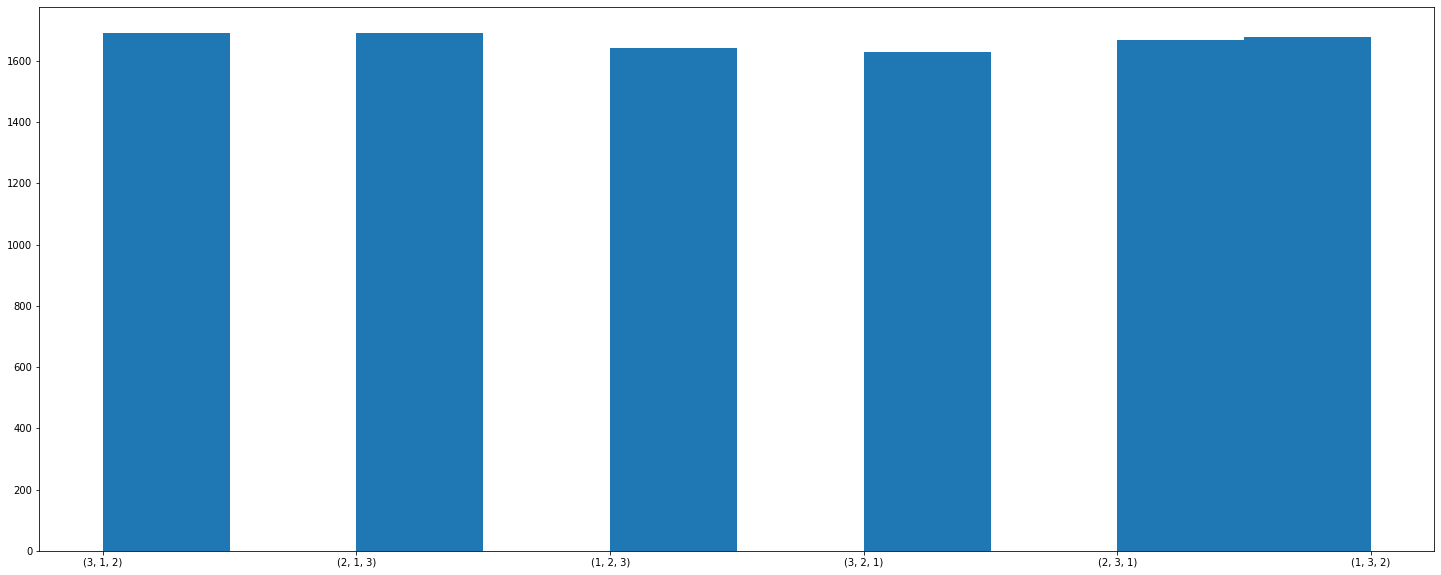

In [ ]:
generate_permu_MCMC(10000,3,9)